In [1]:
# Import dependencies
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Create simple sine wave dataset
def create_sine_wave_dataset(seq_length=100):
    X = np.linspace(0, 50, seq_length)
    y = np.sin(X)
    return X, y

_, data = create_sine_wave_dataset()

time_steps = np.arange(len(data))
print(data[:5])
print(time_steps)

[0.         0.48385164 0.84688556 0.99845223 0.90070545]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [5]:
# Prepare dataset
def prepare_data(data, time_steps, time_window):
    X, y = [], []
    for i in range(len(data) - time_window):
        X.append(data[i:i+time_window])
        y.append(data[i+time_window])
    return np.array(X), np.array(y)

TIME_WINDOW = 10
X, y = prepare_data(data, time_steps, TIME_WINDOW)
print(X.shape, y.shape)

(90, 10) (90,)


In [6]:
# Reshape the data to match RNN input shape
X = X.reshape((X.shape[0], X.shape[1], 1))
# Build the RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(TIME_WINDOW, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

d:\Coding\ibm-ai-engineering\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.fit(X, y, epochs=20, batch_size=16, verbose=1)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3750  
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2076 
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1604 
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0777 
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0188 
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0119 
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0107 
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012     
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0036 
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0017 
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.6607e-04 
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.0621e-04 
Epoch 13/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1069e-04 
Epoch 14/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.3361e-04 
Epoch 15/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.6226e-04 
Epoch 16/

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


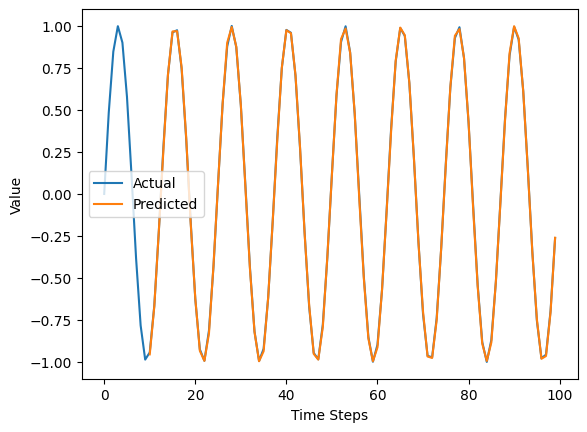

In [8]:
preds = model.predict(X)

plt.plot(time_steps, data, label='Actual')
plt.plot(time_steps[TIME_WINDOW:], preds, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()

In [9]:
# Build the LSTM model
from tensorflow.keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(TIME_WINDOW, 1)))
lstm_model.add(Dense(1))
# Compile the model
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.summary()

d:\Coding\ibm-ai-engineering\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
lstm_model.fit(X, y, epochs=20, batch_size=16, verbose=1)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5517  
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4667 
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4173 
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3749 
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3704 
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3054 
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1710 
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0489 
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0342 
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0054 
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0152 
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0037 
Epoch 13/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0030 
Epoch 14/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0017 
Epoch 15/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012 
Epoch 16/20
6/6 ━━━━━━━━━━━━━━━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


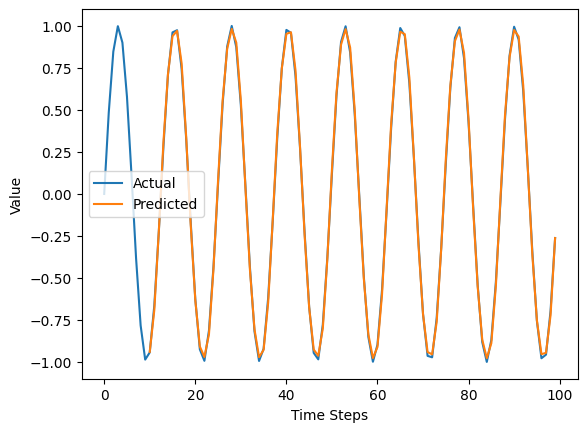

In [11]:
lstm_preds = lstm_model.predict(X)

plt.plot(time_steps, data, label='Actual')
plt.plot(time_steps[TIME_WINDOW:], lstm_preds, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()